In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

In [2]:
# read in data
data = pd.read_csv('bridgewater_data.csv')

In [3]:
# convert data index to time series 
data['date'] = pd.DatetimeIndex(data.date)
data = data.set_index('date')

In [4]:
# glance at data
# - emp1, emp2, emp3 are the three employeees
display(data.head(10))

,emp1,emp2,emp3
date,,,
2013-01-31,45.68,10.89,0.00
2013-02-28,46.13,13.70,10.02
2013-03-31,40.25,14.84,14.85
2013-04-30,38.34,18.17,20.88
2013-05-31,38.55,19.43,22.09
2013-06-30,38.49,19.02,27.53
2013-07-31,40.53,20.99,28.32
2013-08-31,40.92,24.95,30.96
2013-09-30,48.39,26.87,32.52


In [5]:
# look at some stats for each of the three eployees
display(data.describe())

,emp1,emp2,emp3
count,48.000000,48.000000,48.000000
mean,59.280417,52.008750,44.646667
std,13.321598,22.722493,14.572928
min,37.570000,10.890000,0.000000
25%,48.330000,34.142500,36.550000
50%,59.830000,53.245000,47.890000
75%,69.940000,73.627500,55.337500
max,80.420000,84.310000,62.650000


In [6]:
# emp3 does have an outlier at the very beginning of the dataset; do the 
# -- statistics change if we remove that outlier
display(data.emp3.values[1:].mean())
display(data.emp3.values[1:].std())

45.59659574468085

13.002180877067579

It appears that with respect to the monthly level of output that the employee identified as "emp1" tends to have a higher average level of output in addition to being the most consistent of the three employees. However, when we account for the outlier in the data for ‘emp3’ – where this employee has a beginning month with zero output – this latter employee is ever so slightly more consistent than ‘emp1’.

In [7]:
# some helper functions

def my_per_inc(x): # calculates percentage increas/decrease between two points
    return(100*(x[1]-x[0])/x[0])

def my_diff(x): # calculate the difference between two points
    return(x[1]-x[0])

In [8]:
# zero data
zeroed = [data.emp1.iloc[0], data.emp2.iloc[0], data.emp3.iloc[0]]

# plotting function to visualize data
def my_plot(data, fun, window, ylab, ttl, to_zero, zeroed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    if (to_zero):
        ax.plot((data.emp1-zeroed[0]).rolling(window).apply(fun, raw=False), color='red', label='EMP1')
        ax.plot((data.emp2-zeroed[1]).rolling(window).apply(fun, raw=False), color='blue', label='EMP2')
        ax.plot((data.emp3-zeroed[2]).rolling(window).apply(fun, raw=False), color='green', label='EMP3')
    else:
        ax.plot(data.emp1.rolling(window).apply(fun, raw=False), color='red', label='EMP1')
        ax.plot(data.emp2.rolling(window).apply(fun, raw=False), color='blue', label='EMP2')
        ax.plot(data.emp3.rolling(window).apply(fun, raw=False), color='green', label='EMP3')
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel(ylab, fontsize=14)
    ax.set_title(ttl, fontsize=16)
    ax.legend();

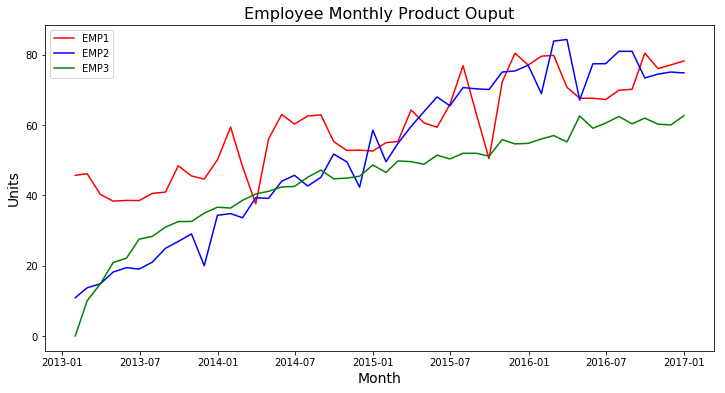

In [9]:
# plot the monthly data of the three employees
my_plot(data, sum, 1, 'Units', 'Employee Monthly Product Ouput', 0, zeroed)

Within the above graph, we see in visual form what we noticed with the descriptive statistics.

-

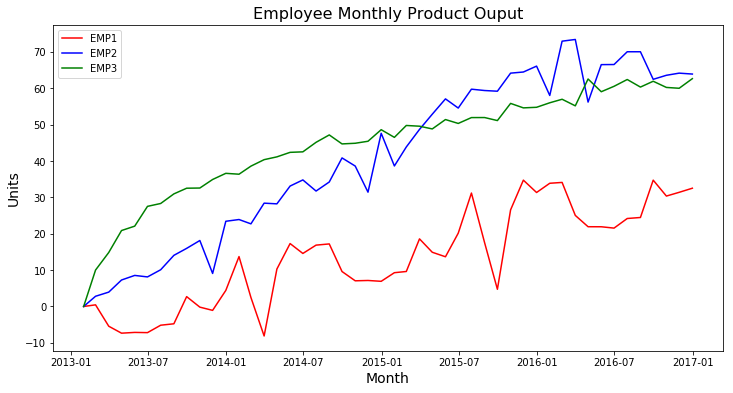

In [10]:
# plot the monthly data of the three employees (zeroed at the beginning)
my_plot(data, sum, 1, 'Units', 'Employee Monthly Product Ouput', 1, zeroed)

Even before examining a plot of percentage month over month growth (as we do immediately below), we see in the above plot that ‘emp1’ does not (in absolute terms) add as much output to their starting level as do the other two employees.

-

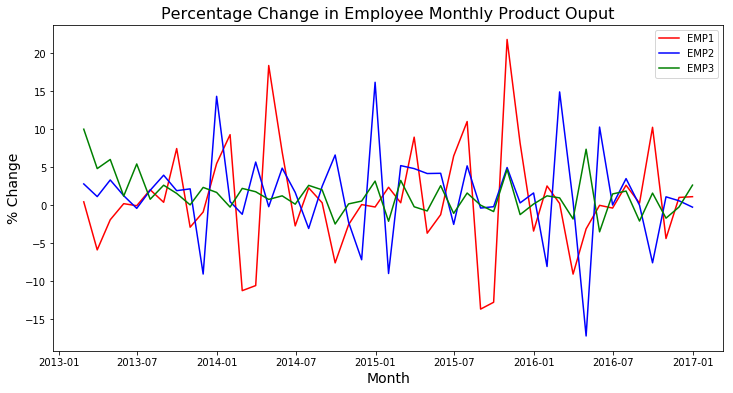

In [11]:
# plot the percentage increase/decrease in productivity from the previous month (i.e. month over month)
my_plot(data, my_diff, 2, '% Change', 'Percentage Change in Employee Monthly Product Ouput', 0, zeroed)

From the above plot, we see that ‘emp1’ appears to be the most consistent not only regarding absolute output but also in terms of growth. Employee ‘emp3’ does not have the large positive swings that ‘emp1’ and ‘emp2’ have, but the former employee also does not have the large negative swings.

-

Examine not month-over-month data but semi-annual (six month) distinct and non-overlapping windows. 

-

In [12]:
# create data over every six months beginning in Jan'13
n_emps = 3 
n_ints = int(np.floor(data.shape[0]/6))
display(n_ints)

8

In [13]:
indices = (np.arange(n_ints+1, dtype=int) * 6)
display(indices)

array([ 0,  6, 12, 18, 24, 30, 36, 42, 48])

In [14]:
data2 = np.zeros((n_ints,n_emps), dtype=float)
display(data2)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [15]:
for j in range(n_emps):
    for i in range(len(indices)-1):
        temp = data[data.columns[j]][indices[i]:indices[i+1]].sum()
        data2[(i,j)] = temp
display(data2)     

array([[247.44,  96.05,  95.37],
       [270.05, 156.13, 195.9 ],
       [324.34, 236.51, 241.37],
       [338.89, 289.83, 275.93],
       [360.32, 361.04, 296.39],
       [420.16, 438.38, 320.23],
       [432.51, 458.96, 350.3 ],
       [451.75, 459.52, 367.55]])

In [16]:
data2 = pd.DataFrame(data2, columns=data.columns, index=data.index[indices[1:]-1])
display(data2)

,emp1,emp2,emp3
date,,,
2013-06-30,247.44,96.05,95.37
2013-12-31,270.05,156.13,195.90
2014-06-30,324.34,236.51,241.37
2014-12-31,338.89,289.83,275.93
2015-06-30,360.32,361.04,296.39
2015-12-31,420.16,438.38,320.23
2016-06-30,432.51,458.96,350.30
2016-12-31,451.75,459.52,367.55


In [17]:
# zero data2
zeroed2 = [data2.emp1.iloc[0], data2.emp2.iloc[0], data2.emp3.iloc[0]]

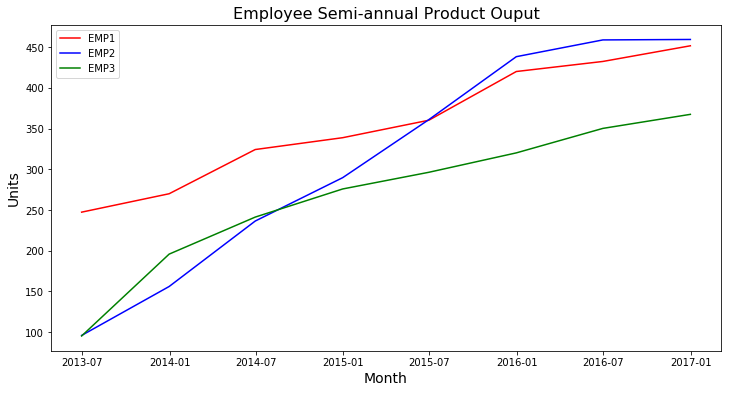

In [18]:
# plot the bi-annual data of the three employees
my_plot(data2, sum, 1, 'Units', 'Employee Semi-annual Product Ouput', 0, zeroed2)

As we would expect, summing over six months reduces the relatively larger month over month variance for all three employees.

-

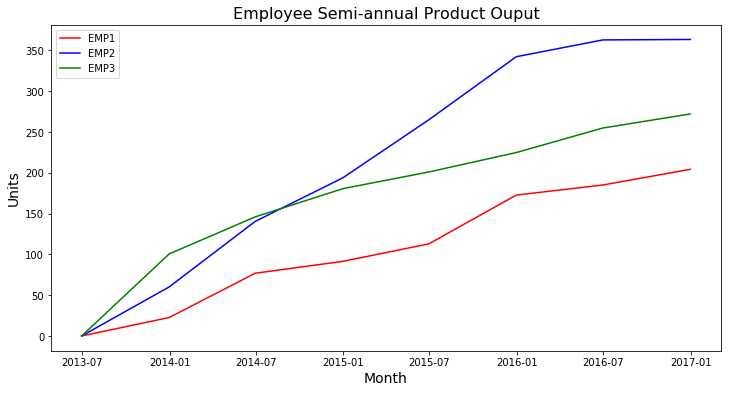

In [19]:
# plot the bi-annual data of the three employees (zeroed at the beginning)
my_plot(data2, sum, 1, 'Units', 'Employee Semi-annual Product Ouput', 1, zeroed2)

-

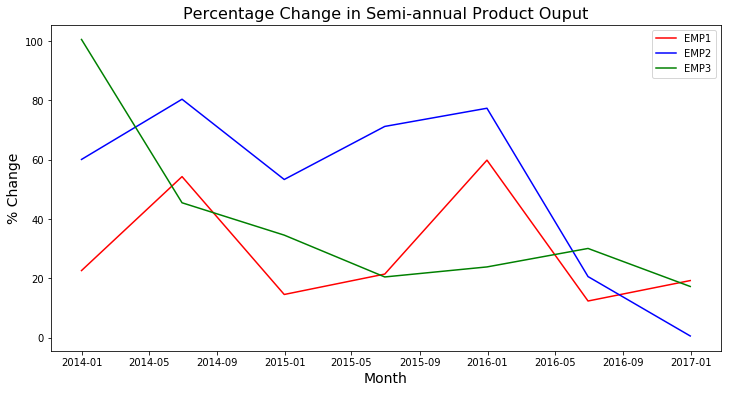

In [20]:
# plot the percentage increase/decrease in productivity from the previous semi-annual period
my_plot(data2, my_diff, 2, '% Change', 'Percentage Change in Semi-annual Product Ouput', 0, zeroed2)

In above plot, we see (as we might expect) that as the absolute level of output increase that growth, when measured over longer and thus less variable periods, begins to stagnate. 

-

In [21]:
# six month aggregate outputs
display(data2)

,emp1,emp2,emp3
date,,,
2013-06-30,247.44,96.05,95.37
2013-12-31,270.05,156.13,195.90
2014-06-30,324.34,236.51,241.37
2014-12-31,338.89,289.83,275.93
2015-06-30,360.32,361.04,296.39
2015-12-31,420.16,438.38,320.23
2016-06-30,432.51,458.96,350.30
2016-12-31,451.75,459.52,367.55


## Table 1

In [22]:
# productivity growth between two six-month aggregate outputs
data2_growth = data2.rolling(window=2).apply(my_per_inc, raw=False,)
display(data2_growth)

,emp1,emp2,emp3
date,,,
2013-06-30,NaN,NaN,NaN
2013-12-31,9.137569,62.550755,105.410506
2014-06-30,20.103685,51.482739,23.210822
2014-12-31,4.486033,22.544501,14.318267
2015-06-30,6.323586,24.569575,7.414924
2015-12-31,16.607460,21.421449,8.043456
2016-06-30,2.939356,4.694557,9.390126
2016-12-31,4.448452,0.122015,4.924351


## Using a weighted average between growth and output to determine bonuses

In [23]:
# calculate for the last periodu 
weight_factor = 0.25 # as an example weighting
bonus_pool_size = 100000 # 100k as an example pool from which to draw bonuses

In [24]:
display((((weight_factor*(data2_growth.iloc[-1]/data2_growth.iloc[-1].sum())) + 
 ((1-weight_factor)*(data2.iloc[-1]/data2.iloc[-1].sum()))) * bonus_pool_size))

emp1    38206.993177
emp2    27271.111724
emp3    34521.895098
Name: 2016-12-31 00:00:00, dtype: float64